In [29]:
import guides
import numpy as np
import matplotlib.pyplot as plt

In [30]:
mode1 = guides.TE_MGMode(mode=1, mirror_distance=7e-6, wavelength=1.55e-6)
mode2 = guides.TE_MGMode(mode=2, mirror_distance=7e-6, wavelength=1.55e-6)

y_range = np.linspace(-3.5e-6, 3.5e-6, 1000)
z_range = np.linspace(0, 1e-4, 1000)

yy, zz = np.meshgrid(y_range, z_range)

In [31]:
Ex1 = mode1.Ex(yy, zz)
Ex2 = mode2.Ex(yy, zz)

Ex = Ex1 + Ex2
ExEx = np.real( Ex * np.conjugate(Ex) )

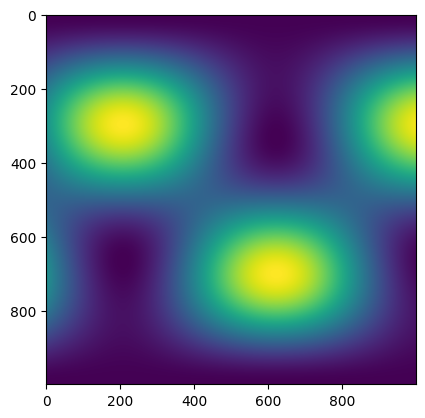

In [32]:
plt.imshow(ExEx.T)
plt.show()